In [18]:
import pandas as pd
import sqlite3
from collections import Counter
import re
import matplotlib.pyplot as plt

Note: the list of philosopher is taken from here https://sv.wikipedia.org/wiki/Lista_%C3%B6ver_filosofer then cleaned up to include only the last name.

Note 2: this is just an example and should be interpreted carefully. 

In [4]:
conn = sqlite3.connect("flashback_filosofi.sqlite3")

In [39]:
df = pd.read_sql_query("SELECT * FROM fb", conn)
print(len(df))
df.time = pd.to_datetime(df.time, format='%H:%M')
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
df.head()

4648


,id,idnumber,user,date,time,body,inreply,title,path
0,1,37183377,adequate,2012-05-05,1900-01-01 03:10:00,Villkor för trådar i Akademisk filosofi är som...,none,Villkor för trådar i Akademisk filosofi,"['Alla forum', 'Vetenskap & humaniora', 'Filos..."
1,2,65864869,jipeess,2018-11-17,1900-01-01 21:10:00,"har den en rationell förklaring,\rdvs, \rom fr...",none,naturalism och ansvarsfrågan...,"['Alla forum', 'Vetenskap & humaniora', 'Filos..."
2,3,65869493,justformybaby,2018-11-18,1900-01-01 13:04:00,handling och konsekvens.,none,naturalism och ansvarsfrågan...,"['Alla forum', 'Vetenskap & humaniora', 'Filos..."
3,4,65883328,frasselito,2018-11-20,1900-01-01 00:37:00,Citat: Ursprungligen postat av jipeess\rom fri...,jipeess,naturalism och ansvarsfrågan...,"['Alla forum', 'Vetenskap & humaniora', 'Filos..."
4,5,65884662,jipeess,2018-11-20,1900-01-01 08:20:00,Citat: Ursprungligen postat av frasselitoom ma...,frasselito,naturalism och ansvarsfrågan...,"['Alla forum', 'Vetenskap & humaniora', 'Filos..."


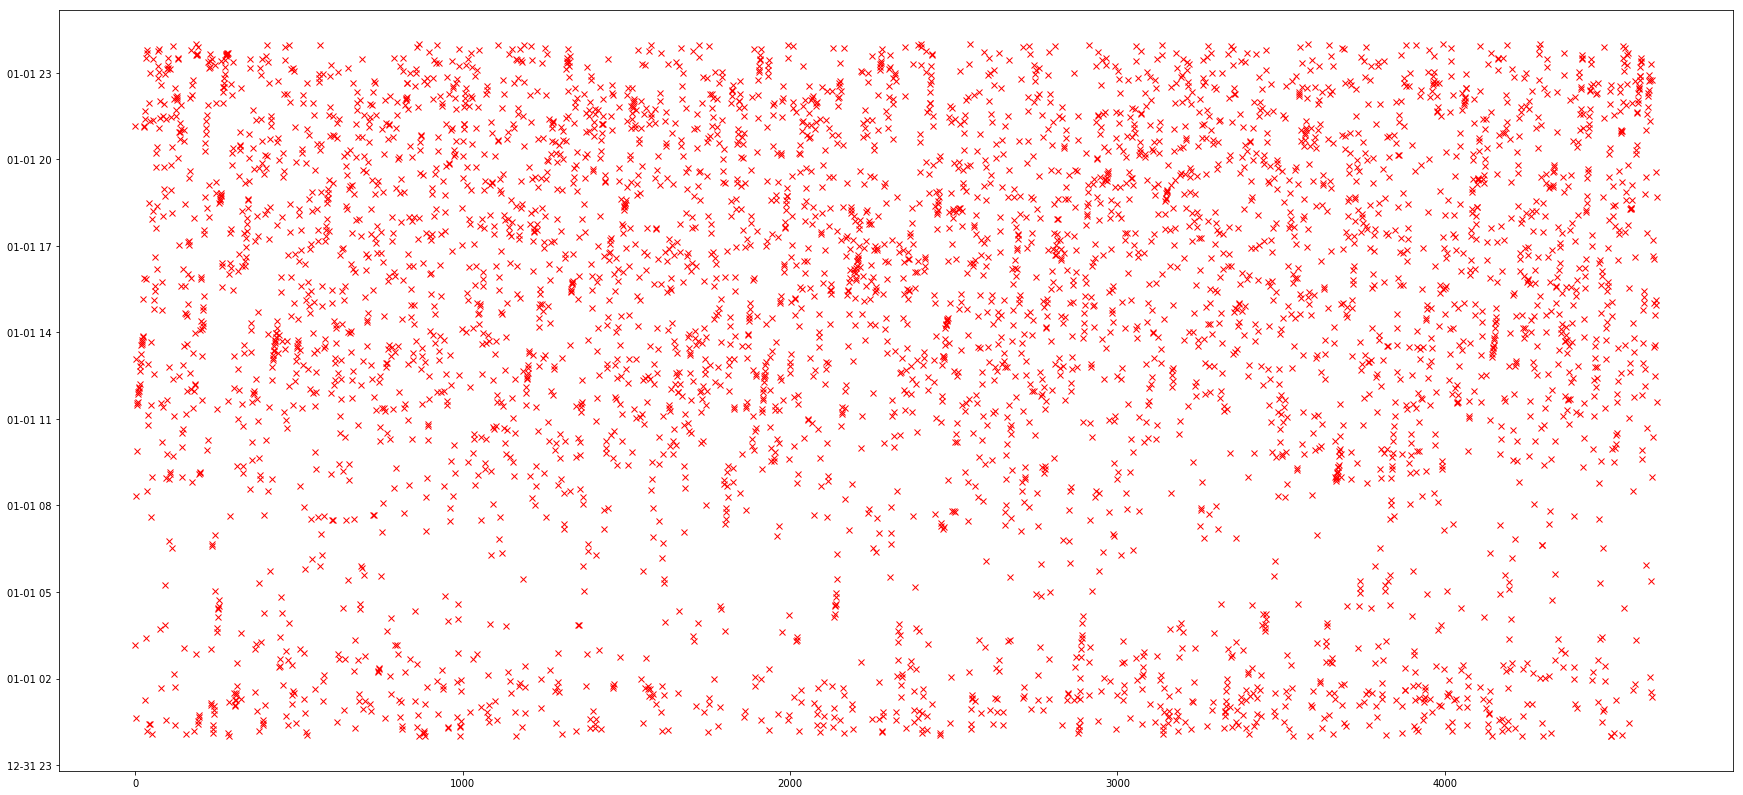

In [40]:
fig = plt.figure(figsize=(30,14))
ax = fig.add_subplot(111)
plt.plot(df['time'], 'rx')

In [1]:
filosofer = []
with open("filosofer.txt", "r") as filolist:
    filonamn = filolist.readlines()
    for f in filonamn:
        if " " not in f:
            filosofer.append(f.strip("\n"))
        else:
            if " " in f.strip("\n"):
                splitname = f.split(" ")
                filosofer.append((splitname[-1].strip("\n")))

#print(filosofer)

In [6]:
citedphilosophers = [] 
for text in df.body:
    for filosof in filosofer:
        if filosof in text:
            citedphilosophers.append(filosof)

In [7]:
counter = 1
for name in Counter(citedphilosophers).most_common(100):
    print(str(counter), name[0], "\t", name[1])
    counter += 1

1 Heidegger 	 346
2 Platon 	 219
3 Sen 	 205
4 Wittgenstein 	 194
5 Kant 	 177
6 Nietzsche 	 140
7 Hegel 	 123
8 Russell 	 114
9 Hume 	 109
10 Foucault 	 102
11 Frege 	 98
12 Popper 	 88
13 Husserl 	 87
14 Sokrates 	 83
15 Derrida 	 83
16 Descartes 	 82
17 Sartre 	 76
18 Mill 	 76
19 Aristoteles 	 58
20 Marx 	 54
21 Kripke 	 52
22 Rawls 	 51
23 Schopenhauer 	 46
24 Searle 	 44
25 Nagel 	 44
26 Lewis 	 40
27 Freud 	 34
28 Locke 	 32
29 Nozick 	 31
30 Pinker 	 30
31 yngre 	 30
32 Kuhn 	 30
33 Leibniz 	 29
34 Strauss 	 28
35 Habermas 	 27
36 Parfit 	 27
37 Berkeley 	 27
38 Gettier 	 26
39 Spencer 	 26
40 Deleuze 	 25
41 Dennett 	 25
42 Newton 	 24
43 Quine 	 23
44 Moore 	 23
45 Carnap 	 22
46 McTaggart 	 21
47 Diamond 	 21
48 Fichte 	 20
49 Spinoza 	 18
50 Darwin 	 16
51 Levinas 	 15
52 Singer 	 15
53 Ockham 	 14
54 Tännsjö 	 13
55 Kierkegaard 	 13
56 store 	 13
57 Hobbes 	 13
58 Otto 	 12
59 Putnam 	 12
60 Pythagoras 	 12
61 Marcuse 	 12
62 Feyerabend 	 12
63 Pascal 	 12
64 Austin 	 11
6

In [8]:
correctspelling = 0
otherspelling = 0
for text in df.body:
    nietzchespelling = re.findall("Nie......", text)
    for n in nietzchespelling:
        if n == "Nietzsche":
            correctspelling +=1
        else:
            otherspelling +=1
            print(n)
print("Correct: ", str(correctspelling))
print("Wrong: ", str(otherspelling))
print("Correct quota: ", str(correctspelling / (correctspelling + otherspelling) * 100))

Nietszche
Nietszche
Nietschze
Nietzcshe
Niezsche:
Nietzche 
Nietzche 
Nietsche 
Nietzshe 
Nietsche 
Nietche s
Nietzshe 
Nietsche,
Nietsche,
Nietschze
Nietschze
Nietsche,
Nietsche 
Nietsche 
Nietsche,
Correct:  224
Wrong:  20
Correct quota:  91.80327868852459


In [26]:
ismer = []
ismcounter = 1

for text in df.body:
    ism = re.findall("\w+ism", text, re.IGNORECASE)
    if ism:
        for i in ism:
            ismer.append(i.lower())
        
for ism in Counter(ismer).most_common(100):
    print(str(ismcounter), ism[0], "\t", ism[1])
    ismcounter += 1

1 realism 	 270
2 idealism 	 196
3 skepticism 	 188
4 solipsism 	 174
5 relativism 	 163
6 utilitarism 	 111
7 empirism 	 109
8 positivism 	 103
9 materialism 	 101
10 fysikalism 	 87
11 nihilism 	 83
12 existentialism 	 82
13 nazism 	 72
14 kunskapsnihilism 	 65
15 determinism 	 62
16 rationalism 	 60
17 physicalism 	 55
18 kapitalism 	 54
19 mekanism 	 54
20 antisemitism 	 52
21 postmodernism 	 46
22 organism 	 46
23 marxism 	 45
24 dualism 	 38
25 externalism 	 38
26 reduktionism 	 34
27 bayesianism 	 33
28 strukturalism 	 32
29 platonism 	 32
30 internalism 	 29
31 nominalism 	 29
32 pragmatism 	 27
33 teism 	 26
34 antirealism 	 26
35 konstruktivism 	 25
36 buddhism 	 25
37 multikulturalism 	 24
38 magnetism 	 23
39 liberalism 	 22
40 biologism 	 21
41 falsifikationism 	 21
42 representationalism 	 21
43 feminism 	 21
44 truism 	 20
45 empiricism 	 20
46 färgfysikalism 	 20
47 rasism 	 20
48 stoicism 	 18
49 individualism 	 18
50 kommunism 	 18
51 modernism 	 18
52 sofism 	 14
53 

In [40]:
ansker = []
anskcounter = 1

for text in df.body:
    ansk = re.findall(r"\w+istisk\b", text, re.IGNORECASE)
    if ansk:
        for a in ansk:
            ansker.append(a.lower())
#print(ansker)
for ansk in Counter(ansker).most_common(100):
    print(str(anskcounter), ansk[0], "\t", ansk[1])
    anskcounter += 1

1 statistisk 	 47
2 reduktionistisk 	 27
3 relativistisk 	 25
4 positivistisk 	 23
5 idealistisk 	 20
6 materialistisk 	 19
7 realistisk 	 16
8 utilitaristisk 	 15
9 deterministisk 	 13
10 fysikalistisk 	 11
11 externalistisk 	 10
12 nazistisk 	 10
13 nihilistisk 	 9
14 marxistisk 	 9
15 lingvistisk 	 9
16 pessimistisk 	 8
17 surrealistisk 	 8
18 humanistisk 	 7
19 empiristisk 	 6
20 egoistisk 	 6
21 socialistisk 	 6
22 strukturalistisk 	 6
23 existentialistisk 	 5
24 essentialistisk 	 5
25 perspektivistisk 	 5
26 representationalistisk 	 5
27 objektivistisk 	 4
28 naturalistisk 	 4
29 altruistisk 	 4
30 konstruktionistisk 	 4
31 humoristisk 	 3
32 dekonstruktivistisk 	 3
33 optimistisk 	 3
34 fascistisk 	 3
35 teistisk 	 3
36 poststrukturalistisk 	 3
37 rasistisk 	 3
38 atomistisk 	 3
39 kollektivistisk 	 3
40 ateistisk 	 2
41 utliltaristisk 	 2
42 struktualistisk 	 2
43 antagonistisk 	 2
44 nationalsocialistisk 	 2
45 kunskapsidealistisk 	 2
46 deskriptivistisk 	 2
47 sofistisk 	 2
4

In [46]:
links = []

for b in df.body:
    urls = re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', b)
    if urls:
        for u in urls:
            links.append(u)
            
for a, b in Counter(links).most_common(20):
    print(a, b)

http://en.wikipedia.org 109
http://sv.wikipedia.org 40
http://www.counter-currents.com 29
http://plato.stanford.edu 29
https://www.flashback.org 24
http://www.youtube.com 22
https://www.youtube.com 17
https://en.wikipedia.org 17
http://www.dn.se 7
http://www.mphy.lu.se 5
http://www.theguardian.com 5
http://www.toqonline.com 5
http://books.google.se 5
http://www.ditext.com 5
http://www.adlibris.com 5
http://www.svd.se 5
http://www.samharris.org 4
http://sverigesradio.se 4
http://www.seedwiki.com 4
http://foucault.info 4
